<a href="https://colab.research.google.com/github/Nehach73/DS3001_project1/blob/main/DS3001Project1Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

gss = pd.read_parquet("https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet")
gss = gss.dropna(how = "all")

In [41]:
filt = gss.filter(items = ["year", "occ", "wrkstat", "hrs1", "income06",
                           "degree", "marital", "happy", "partyid"],axis=1)
yrgss = filt[(filt["year"] == 2006) | (filt["year"] == 2008) | (filt["year"] == 2010)]
yrgss

,year,occ,wrkstat,hrs1,income06,degree,marital,happy,partyid
0,2006,NaN,working full time,40.0,$110000 to $129999,high school,married,NaN,"independent (neither, no response)"
1,2006,NaN,in school,NaN,$75000 to $89999,bachelor's,never married,pretty happy,"independent (neither, no response)"
2,2006,NaN,working full time,35.0,$60000 to 74999,bachelor's,divorced,pretty happy,not very strong republican
3,2006,NaN,working full time,50.0,$35000 to 39999,high school,never married,NaN,not very strong republican
4,2006,NaN,working full time,40.0,$75000 to $89999,bachelor's,married,very happy,not very strong republican
...,...,...,...,...,...,...,...,...,...
6822,2010,NaN,retired,NaN,$150000 or over,bachelor's,married,pretty happy,strong republican
6823,2010,NaN,retired,NaN,$12500 to 14999,high school,widowed,not too happy,strong republican
6824,2010,NaN,working full time,40.0,$20000 to 22499,high school,separated,very happy,not very strong democrat
6825,2010,NaN,working full time,49.0,$6 000 to 6 999,bachelor's,divorced,pretty happy,"independent (neither, no response)"


In [42]:
# converting categorical gradients to numeric variables
yrgss['happy'].unique()
yrgss['happy'].replace(['not too happy', 'pretty happy', 'very happy', 'NaN'],[0, 1, 2, np.nan], inplace=True)

<ipython-input-42-95d355c0caa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrgss['happy'].replace(['not too happy', 'pretty happy', 'very happy', 'NaN'],[0, 1, 2, np.nan], inplace=True)


Income vs happiness over time

<Axes: xlabel='happy', ylabel='income06'>

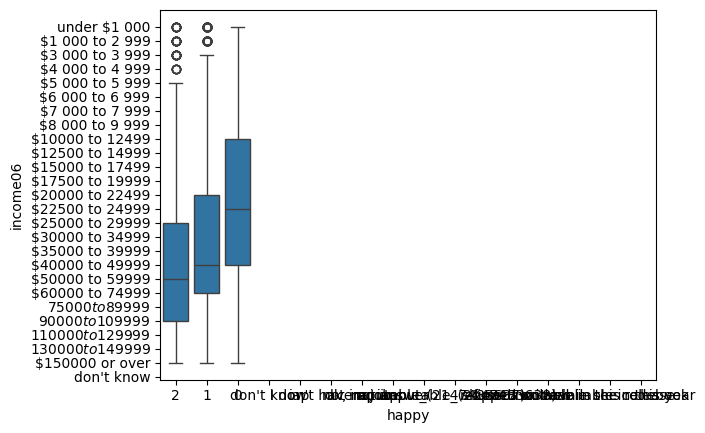

In [43]:
sns.boxplot(data = yrgss,x = 'happy', y = 'income06')